Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1900
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0549
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0462
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0491
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0455
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0486
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0510
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0447
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0485
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0476
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


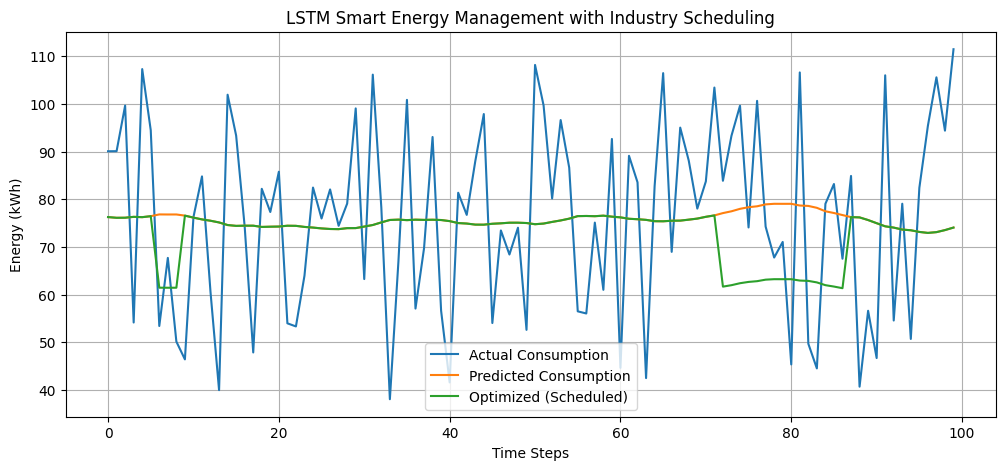

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# -----------------------------
# 1. Simulate Industrial Data
# -----------------------------
np.random.seed(42)

hours = np.arange(0, 24*30)
temperature = np.random.uniform(18, 38, len(hours))
machines = np.random.randint(5, 20, len(hours))

energy = (
    1.2 * temperature +
    3.5 * machines +
    np.sin(hours/24 * 2*np.pi) * 5 +
    np.random.normal(0, 2, len(hours))
)

data = pd.DataFrame({
    "Energy_kWh": energy
})

# -----------------------------
# 2. Normalize Data
# -----------------------------
scaler = MinMaxScaler()
scaled_energy = scaler.fit_transform(data)

# -----------------------------
# 3. Create Sequences
# -----------------------------
def create_seq(dataset, step=24):
    X, y = [], []
    for i in range(len(dataset)-step):
        X.append(dataset[i:i+step])
        y.append(dataset[i+step])
    return np.array(X), np.array(y)

X, y = create_seq(scaled_energy, 24)

train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# -----------------------------
# 4. LSTM Model
# -----------------------------
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# -----------------------------
# 5. Prediction
# -----------------------------
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_inv = scaler.inverse_transform(y_test)

# -----------------------------
# 6. Industry Scheduling Logic
# -----------------------------
optimized = predicted.copy()

peak_threshold = np.percentile(predicted, 75)

for i in range(len(optimized)):
    if optimized[i] > peak_threshold:
        optimized[i] = optimized[i] * 0.80  # shift 20% load

# -----------------------------
# 7. Visualization
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(y_test_inv[:100], label="Actual Consumption")
plt.plot(predicted[:100], label="Predicted Consumption")
plt.plot(optimized[:100], label="Optimized (Scheduled)")
plt.xlabel("Time Steps")
plt.ylabel("Energy (kWh)")
plt.title("LSTM Smart Energy Management with Industry Scheduling")
plt.legend()
plt.grid(True)
plt.show()
